In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#reading data:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

# Investigating the data:

In [3]:
# Findings: we want to predict the SalesPrice of homes based on high corr features.
# this is linear regression problem because we are predicting continous value.
# We have X_train, X_test, y_train only. y_test don't exist they have it for evaluation.

In [4]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
#Investigating data, "train" csv file:
df_train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [6]:
#Investigating data, "test" csv file:
df_test.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [7]:
#checking the shapes of our data:
print('Train shape = ' + str(df_train.shape) + '\nTest shape = ' + str(df_test.shape))#

Train shape = (1460, 81)
Test shape = (1459, 80)


In [8]:
#The SalePrice not included in test:

for ttest in df_train.columns:
    if ttest not in df_test.columns:
        print(ttest)
        
len(df_test.columns), len(df_train.columns)

SalePrice


(80, 81)

In [9]:
#Check for nulls:   Alley
# train.info()
# test.info()

### Data sets contents:

**train:** 
- Has (1460 rows) & (81 columns).
- Of which 19 contain null values.
- extra column "SalePrice(y)"

**test:** 
- Has (1459 rows) & (80 columns).
- Of which 19 contain null values.
- Of which 33 contain null values.



# Cleaning data:

In [10]:
#Check nulls:

null_col = df_train.columns[df_train.isna().any()].tolist()
for col in null_col:
    print("")
#     print("Column name : {} \n \
#            Number of null : {} \n \
#            Unique values: {} ".format(col, df_train[col].isna().sum(), df_train[col].value_counts().sum()))

In [11]:
#Replacing missing objects with NA, and floats with 0:

null_col = df_train.columns[df_train.isna().any()].tolist()

for col in null_col:
    if df_train[col].dtype == "float64":
        df_train[col].fillna(value=0, inplace=True)
    if df_train[col].dtype == "object":
        df_train[col].fillna(value="NA", inplace=True)
#     print("Column name : {} \n \
#            Number of null : {} \n \
#            Unique values: {} \n \
#            Dtypes: {}".format(col, train[col].isna().sum(), train[col].value_counts().sum(), train[col].dtype))

In [12]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000


In [13]:
#Check nulls again:

null_col = df_train.columns[df_train.isna().any()].tolist()
for col in null_col:
    print("Column name : {} \n \
           Number of null : {} \n \
           Unique values: {} ".format(col, df_train[col].isna().sum(), df_train[col].value_counts().sum()))

In [33]:
#checking the highest correlation with target(y):
train_dummies = pd.get_dummies(df_train)
high_corr = [train_dummies.corr()["SalePrice"] > 0.5] or [train_dummies.corr()["SalePrice"] < -0.5]
# list(elem for elem in high_corr if elem == True)
df_ = pd.DataFrame(high_corr)
Trues = []
for col in df_.columns:
    if df_[col].values == True:
        print(col)

OverallQual
YearBuilt
YearRemodAdd
TotalBsmtSF
1stFlrSF
GrLivArea
FullBath
TotRmsAbvGrd
GarageCars
GarageArea
SalePrice
BsmtQual_Ex
KitchenQual_Ex


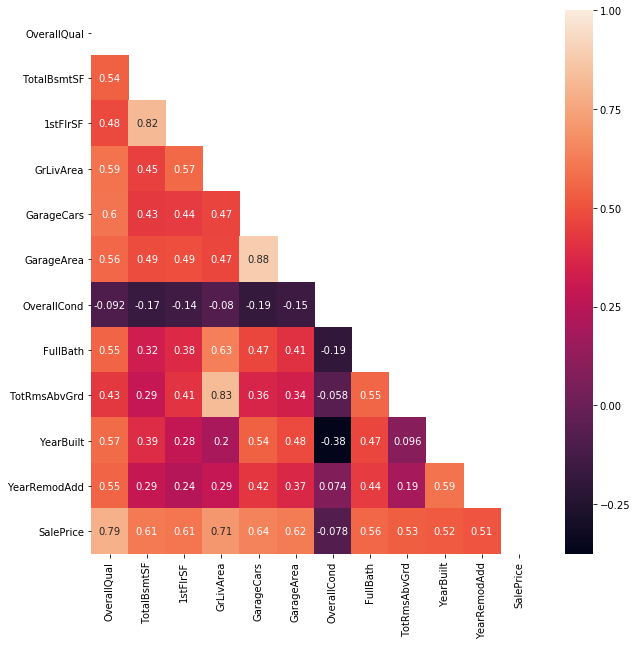

In [43]:
corr_col = df_train[['OverallQual', 'TotalBsmtSF','1stFlrSF', 'GrLivArea', \
       'GarageCars', 'GarageArea','OverallCond','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd','SalePrice' ]]
train_corr = corr_col.corr()
fig, ax = plt.subplots(figsize=(10,10))
mask = np.zeros_like(train_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(train_corr, annot=True, mask=mask)

In [45]:
corr_col.head()

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars,GarageArea,OverallCond,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,SalePrice
0,7,856,856,1710,2,548,5,2,8,2003,2003,208500
1,6,1262,1262,1262,2,460,8,2,6,1976,1976,181500
2,7,920,920,1786,2,608,5,2,6,2001,2002,223500
3,7,756,961,1717,3,642,5,1,7,1915,1970,140000
4,8,1145,1145,2198,3,836,5,2,9,2000,2000,250000


## Let's visualize it (scatter plot)

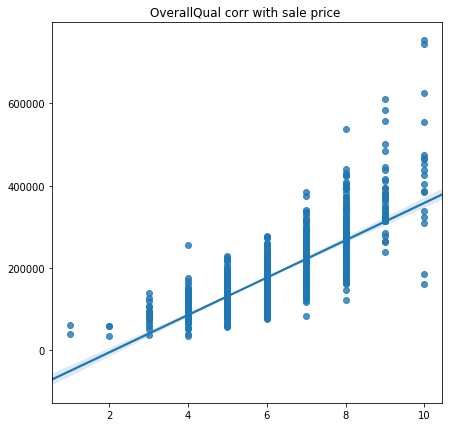

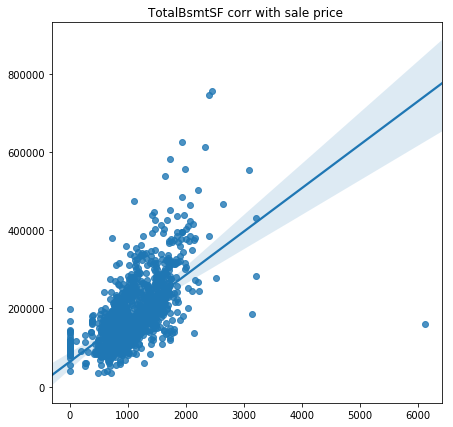

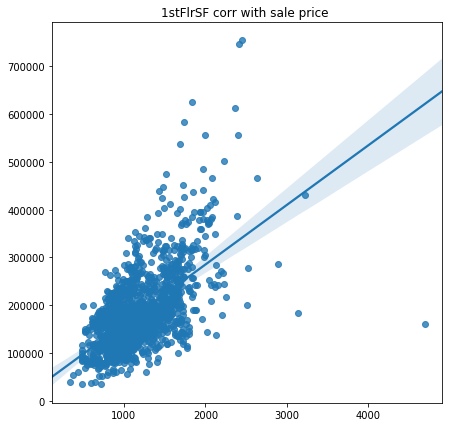

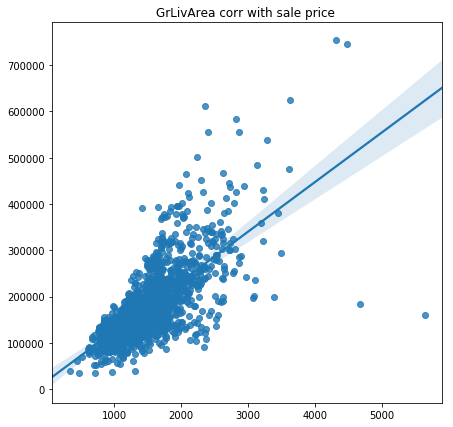

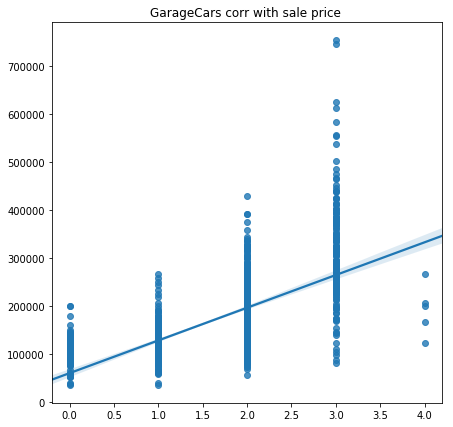

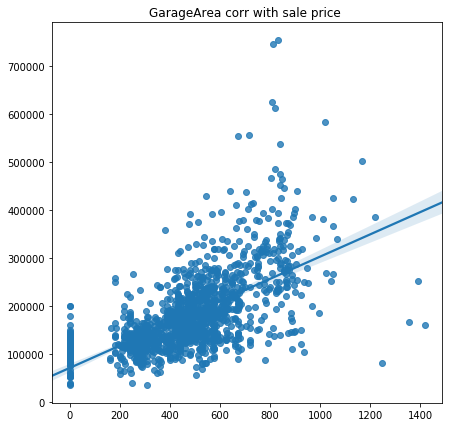

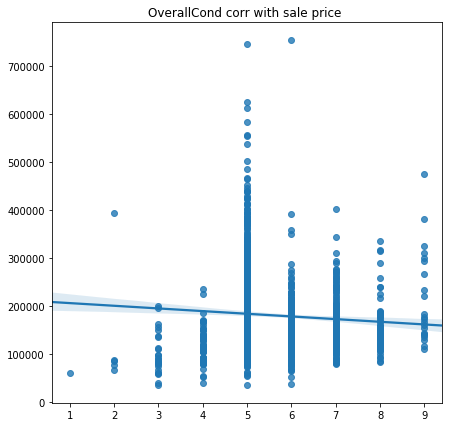

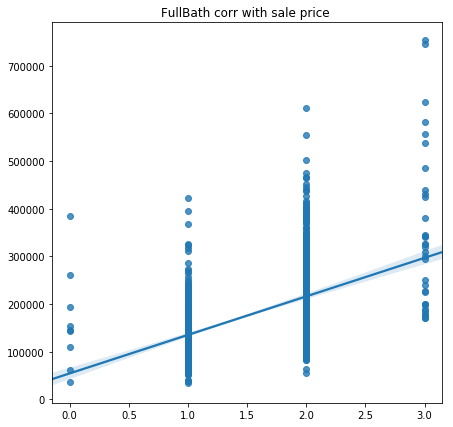

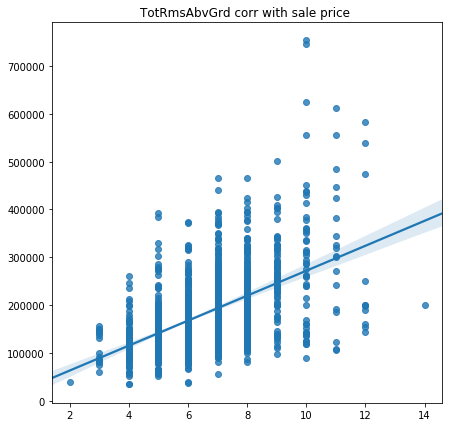

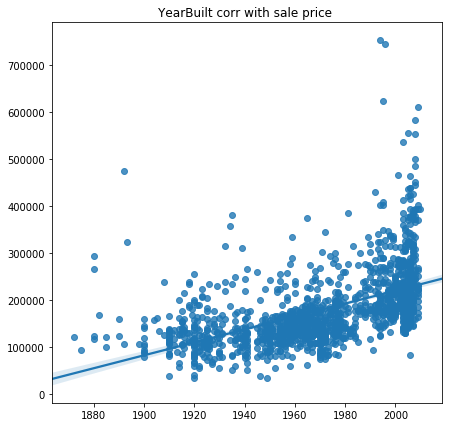

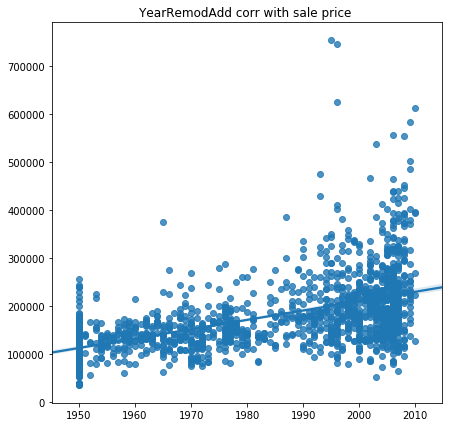

In [47]:
high_corr_col = ['OverallQual', 'TotalBsmtSF','1stFlrSF', 'GrLivArea', \
       'GarageCars', 'GarageArea','OverallCond','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd']


for col in high_corr_col:
    plt.figure(figsize=(7,7))
    sns.regplot(train_dummies[col].values ,train_dummies['SalePrice'].values)
    plt.title("{} corr with sale price ".format(col))
    plt.show()
    

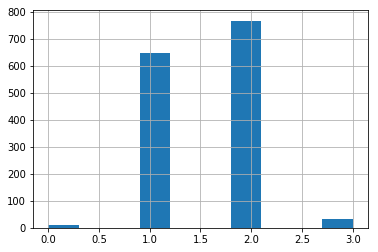

In [55]:
### note about distrubition:

# 'OverallCond','FullBath','TotRmsAbvGrd' seems not normally distributed.

df_train['FullBath'].hist()
# ['OverallQual', 'TotalBsmtSF','1stFlrSF', 'GrLivArea', \
#        'GarageCars', 'GarageArea','OverallCond','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd']

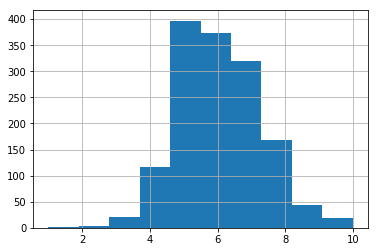

In [18]:
df_train.OverallQual.hist()

## Modeling part

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [20]:
X = df_train[['OverallQual', 'TotalBsmtSF','1stFlrSF', 'GrLivArea', \
       'GarageCars', 'GarageArea','OverallCond']]
y = df_train[['SalePrice']]


ss = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, shuffle=True, random_state=4) # stratify=y, 


X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

/home/abdulmalik0x/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/abdulmalik0x/.local/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/abdulmalik0x/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  if sys.path[0] == '':


In [21]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [22]:
lr = LinearRegression()

lr.fit(X_train, y_train)
lr.score(X_test, y_test)
y_pred = lr.predict(X_train)

In [23]:
# Setting baseline on mean to compare with predicted mean

print(y_pred.mean())
print(y_train.mean())

181002.5094178082
SalePrice    181002.509418
dtype: float64


In [24]:
y_pred

array([[220099.98499107],
       [271256.01506454],
       [103788.24460526],
       ...,
       [164993.65238546],
       [206451.02037676],
       [178711.29536525]])

In [25]:
y_train.tail()

,SalePrice
360,156000
709,109900
439,110000
174,184000
1146,180000


## Validation using k-fold

In [26]:
predictions = cross_val_predict(lr, X, y, cv=10)
len(X), len(y), len(predictions)

(1460, 1460, 1460)

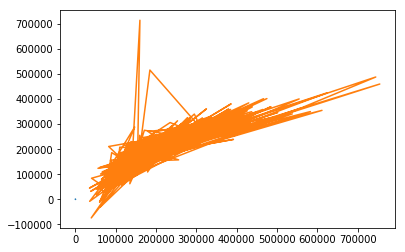

In [27]:
point_1 = [10, 50]
plt.plot(point_1, point_1)
# sns.regplot(y, predictions)
plt.plot(y, predictions)
plt.show()

In [28]:
metrics.r2_score(y, predictions)

0.7522611553631977

In [29]:
from sklearn.model_selection import KFold

X = df_train[['OverallQual','TotalBsmtSF','1stFlrSF', 'GrLivArea', \
       'GarageCars', 'GarageArea', 'OverallCond']] # OverallCond

kf = KFold(n_splits=5, shuffle=True)
scores = cross_val_score(lr, X, y, cv=kf)
print("Cross-validated scores:", scores)
print("Mean cross-validated scores:", scores.mean())

Cross-validated scores: [0.75903863 0.53393075 0.80247836 0.761317   0.80438115]
Mean cross-validated scores: 0.7322291777332015


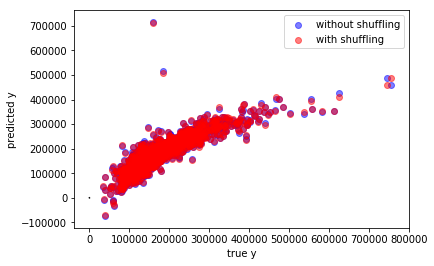

In [30]:
# Make cross validated predictions on the test sets
predictions_shuffled = cross_val_predict(lr, X, y, cv=kf)

point_1 = [10, 50]
plt.plot(point_1, point_1, 'k')
plt.scatter(y, predictions, c='b', alpha=0.5, label='without shuffling')
plt.scatter(y, predictions_shuffled, c='r', alpha=0.5, label='with shuffling')
plt.xlabel('true y')
plt.ylabel('predicted y')
plt.legend()
plt.show()

## Remove outlier and try model again

In [ ]:
df_train['TotalBsmtSF'] = remove_outlier(df_train, 'TotalBsmtSF')
print(len(df_train['TotalBsmtSF']))

colll = remove_outlier(df_train, 'TotalBsmtSF').dropna()
print(len(colll))
print(type(colll))

df_train = pd.concat([df_train.loc[:,'TotalBsmtSF'], colll], axis=1)

In [ ]:
for i in col:
    new_col = remove_outlier(df_train, i)
    df_train = pd.concat([df_train.loc[:,i], new_col], axis=1)
    print(len(df_train[i]))